# Challenge 2 : Correlating Magnetic disturbances with the observation of the Northern Lights using THEMIS-ASI

## Author : Abhishek .
## School : University of Manitoba

## Goal : Develop an algorithm to correlate indicators from the magnetometer data with the aurora observations for forecasting purposes

## 1. Problem statement


![problem_statement](.\data\problem_statement.png)

## 2. Data Extraction and Visualization

In [12]:
# Import the basic python modules
import os
import csv
from datetime import datetime
import time

In [13]:
# Import the data structuring and pre-processing libraries
import pandas as pd
import numpy as np

In [14]:
# Import visualization libraries for plotting and visualizing the dataset vectors
import matplotlib.pyplot as plt

In [15]:
# Print the current working directory for plotting and visualizing the dataset vectors
current_working_directory = os.getcwd()
print(current_working_directory)

C:\Users\Alpha\Documents\GitHub\spaceAppsChallenge


## Two different datasets to work with and determine correlations in:

### 1. THEMIS-ASI ( THEMIS Ground-based All-Sky Images )
### 2. THEMIS-GMAGS ( THEMIS Fluxgate Magnetometers )

### Dataset 1 Characteristics

1. **THEMIS-ASI Stations Map**

![ASI-Stations](.\data\THEMIS\misc_images\themis-asi-stations.jpg)

2. **Example ASI Montage : Dataset Format - .pgm (Portable Graymap Format)**

![ASI-Examples](.\data\THEMIS\misc_images\themis_asi_examples.jpg)

### Dataset 2 Characteristics

1. **THEMIS-GMAG Example HKD File**

![THEMIS-GMAG](.\data\THEMIS\misc_images\themis-gmag.png)

## Since all the data collection takes place at the ground stations, it is important to get any possible data about them.

In [16]:
ground_station_df = pd.read_table('.\data\THEMIS\ground_stations.txt', sep=' ')
display(ground_station_df)

,StationCode,GeogLat-1,GeogLong-1,Name,GeomLat-2,GeomLong-2,Midnight(hh:mm)
0,ATHA,54.714,246.686,"Athabasca,AB",61.98,306.76,8:07
1,CHBG,49.814,285.581,"Chibougamau,QC",59.57,3.62,4:49
2,EKAT,64.717,250.667,"Ekati,NT",72.28,307.66,8:02
3,FSIM,61.762,238.779,"FortSimpson,NT",67.30,293.85,8:57
4,FSMI,59.984,248.158,"FortSmith,NT",67.38,306.64,8:06
5,FYKN,66.560,214.786,"FortYukon,AK",67.24,266.14,11:00
6,GAKO,62.407,214.842,"Gakona,AK",63.06,269.02,10:48
7,GBAY,53.316,299.540,"GooseBay,NL",60.73,23.08,3:37
8,GILL,56.354,265.344,"Gillam,MB",66.18,332.78,6:34
9,INUV,68.413,226.230,"Inuvik,NT",71.23,275.09,10:17


## Once the data about the stations is extracted, we can focus on the primary two datasets. We also need to determine the availability of the magnetometer values in conjunction with the ASI data values.

In [17]:
# Read in the dataframe to determine the availability of the ASI data for each of the stations
asi_availability_df = pd.read_csv('.\\data\\THEMIS\\data_availability\\themis_asi_data_availability.csv', sep=',')

print("Displaying the dataframe for the availability of the ASI data for each of the stations:")
display(asi_availability_df)

Displaying the dataframe for the availability of the ASI data for each of the stations:


,,Geog Lat (deg),Geog Long (deg),Name,Geom Lat (deg),Geom Long (deg),2001,2004,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Notes
0,atha,54.714,246.686,"Athabasca,AB",61.98,306.76,0,0,13,237,...,327,365,364,341,359,351,264,256,157,NaN
1,berk,?,?,?,?,?,0,0,2,14,...,0,0,78,0,0,0,0,0,0,NaN
2,brk2,?,?,?,?,?,0,0,0,4,...,0,0,0,0,0,0,0,0,0,NaN
3,calg,?,?,?,?,?,0,0,40,0,...,8,36,38,83,30,89,112,0,2,NaN
4,chbg,49.814,285.581,"Chibougamau,QC",59.57,3.62,0,0,40,193,...,190,260,140,359,289,124,100,239,179,NaN
5,ekat,64.717,250.667,"Ekati,NT",72.28,307.66,0,0,0,122,...,0,0,0,0,0,0,0,0,0,Sent to YKNF 2/29/2008
6,fsim,61.762,238.779,"Fort Simpson,NT",67.3,293.85,0,0,3,171,...,152,277,181,275,277,253,147,192,105,NaN
7,fsmi,59.984,248.158,"Fort Smith,NT",67.38,306.64,1,0,0,213,...,292,289,289,292,291,265,255,264,136,NaN
8,fykn,66.560,214.786,"Fort Yukon,AK",67.24,266.14,0,0,68,187,...,167,195,172,112,0,0,0,0,0,NaN
9,gako,62.407,214.842,"Gakona, AK",63.06,269.02,0,0,7,269,...,253,265,117,125,0,0,0,0,0,NaN


In [18]:
# Read in the dataframe to determine the availability of the GMAG data for each of the stations
gmag_availability_df = pd.read_csv('.\\data\\THEMIS\\data_availability\\themis_gmag_data_availability.csv', sep=',')

print("Displaying the dataframe for the availability of the GMAG data for each of the stations:")
display(gmag_availability_df)

Displaying the dataframe for the availability of the GMAG data for each of the stations:


,,Geog Lat (deg),Geog Long (deg),Name,Geom Lat (deg),Geom Long (deg),2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Notes
0,ATHA,54.714,246.686,"Athabasca,AB",61.98,306.76,0,2,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,B3RK,?,?,?,?,?,0,0,0,49,...,0,0,0,0,0,0,0,0,0,NaN
2,BERK,?,?,?,?,?,0,0,1,20,...,0,13,19,0,0,0,1,0,0,NaN
3,CALG,?,?,?,?,?,0,0,0,0,...,0,0,0,0,0,13,67,9,0,NaN
4,CHBG,49.814,285.581,"Chibougamau,QC",59.57,3.62,0,0,107,74,...,153,271,131,365,310,127,107,254,215,NaN
5,EKAT,64.717,250.667,"Ekati,NT",72.28,307.66,0,177,338,0,...,0,0,0,0,0,0,0,0,0,NaN
6,ELL0,?,?,?,?,?,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7,FYKN,66.560,214.786,"Fort Yukon,AK",67.24,266.14,0,42,213,1,...,0,0,0,0,0,0,0,0,0,NaN
8,GAKO,62.407,214.842,"Gakona, AK",63.06,269.02,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
9,GB10,?,?,?,?,?,0,44,210,0,...,0,0,0,0,0,0,0,0,0,NaN


## Choose the year to work with to format and extract availability information from the dataset

### Currently working with : 2017

In [19]:
year = '2017'
largest_threshold = 10

# Extract the series from the df for the year currently working with
asi_2017 = asi_availability_df.nlargest(largest_threshold, year)
gmag_2017 = gmag_availability_df.nlargest(largest_threshold, year)

In [20]:
print("Displaying the dataframe for the availability of the ASI data for top 10 stations:")
display(asi_2017)

Displaying the dataframe for the availability of the ASI data for top 10 stations:


,,Geog Lat (deg),Geog Long (deg),Name,Geom Lat (deg),Geom Long (deg),2001,2004,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Notes
19,pina,50.163,263.934,"Pinawa,MB",60.08,331.46,0,2,0,308,...,334,296,283,324,365,364,360,346,155,NaN
13,kapu,49.392,277.680,"Kapuskasing,ON",59.76,351.95,0,0,0,266,...,365,365,351,324,357,257,277,330,159,NaN
22,snkq,56.536,280.769,"Sanikiluaq,NU",66.45,356.99,0,0,0,254,...,317,309,248,287,291,324,325,321,121,NaN
15,kuuj,58.155,291.468,"Kuujjuaq,QC",66.89,13.23,0,0,0,46,...,301,253,255,268,255,275,239,298,141,NaN
7,fsmi,59.984,248.158,"Fort Smith,NT",67.38,306.64,1,0,0,213,...,292,289,289,292,291,265,255,264,136,NaN
0,atha,54.714,246.686,"Athabasca,AB",61.98,306.76,0,0,13,237,...,327,365,364,341,359,351,264,256,157,NaN
11,gill,56.354,265.344,"Gillam,MB",66.18,332.78,0,0,119,205,...,306,230,323,308,324,215,301,249,152,NaN
4,chbg,49.814,285.581,"Chibougamau,QC",59.57,3.62,0,0,40,193,...,190,260,140,359,289,124,100,239,179,NaN
10,gbay,53.316,299.540,"Goose Bay,NL",60.73,23.08,0,0,17,128,...,365,144,76,223,285,216,44,232,0,NaN
23,talo,69.541,266.446,"Taloyoak, NT",78.39,330.01,0,0,0,0,...,228,228,229,82,0,0,98,222,103,ASI From PGEO 11/8/2008


In [21]:
print("Displaying the dataframe for the availability of the GMAG data for top 10 stations:")
display(gmag_2017)

Displaying the dataframe for the availability of the GMAG data for top 10 stations:


,,Geog Lat (deg),Geog Long (deg),Name,Geom Lat (deg),Geom Long (deg),2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Notes
27,KUUJ,58.155,291.468,"Kuujjuaq,QC",66.89,13.23,0,0,0,0,...,360,316,344,355,365,365,334,365,158,NaN
24,INUV,68.413,226.230,"Inuvik,NT",71.23,275.09,0,141,114,365,...,355,363,345,357,309,345,366,363,190,NaN
26,KIAN,66.971,199.562,"Kiana,AK",65.13,253.47,0,0,41,365,...,365,228,264,343,347,173,351,357,216,NaN
29,PGEO,53.815,237.172,"Prince George,BC",59.13,295.67,97,363,140,0,...,321,338,358,361,352,353,292,354,102,NaN
32,TPAS,53.994,259.059,"The Pas,MB",63.27,323.8,0,179,359,330,...,325,283,304,346,166,0,306,273,174,NaN
4,CHBG,49.814,285.581,"Chibougamau,QC",59.57,3.62,0,0,107,74,...,153,271,131,365,310,127,107,254,215,NaN
25,KAPU,49.392,277.680,"Kapuskasing,ON",59.76,351.95,0,0,229,353,...,365,365,352,325,362,260,309,222,216,NaN
33,WHIT,61.010,224.777,"Whitehorse,YT",63.66,278.14,0,174,353,365,...,365,334,289,337,365,365,362,219,0,NaN
19,GBAY,53.316,299.540,"Goose Bay,NL",60.73,23.08,0,0,158,234,...,365,146,134,195,314,221,321,217,0,NaN
28,MCGR,62.953,204.404,"Mcgrath,AK",61.72,259.84,0,123,356,358,...,259,361,366,239,365,114,84,98,216,NaN


## Since the dataset for the whole year 2017 is quite large, will focus on the events observed in January 2017 and their correlation with the magnetometer data

## Dataset Characteristics

### 1. ASI

   > Montages with .pgm format, can be used to extract numerical values.
   > Original stored in sub-directories in .gz compressed format( can use gzip module to unzip and extract data ).
   > Once extracted, can be use a .pgm files for mining.
   
### 2. GMAG
> Stored in sub-directories in HKD files.
> Can use the station codes in the dataframes above to extract those files and build-up a dataframe of the magnetometer data collected by all the stations.

In [22]:
# Dictionary storing the locations of all the GMAG stations
gmag_station_dict = {}

# Add the values to the GMAG location dictionary
for station_code in gmag_2017[' '].values:
    station_index = gmag_2017[' '][gmag_2017[' '] == station_code].index[0]
    location_list = []
    location_list.append(gmag_2017['Geog Lat  (deg)'][station_index])
    location_list.append(gmag_2017['Geog Long (deg)'][station_index])
    location_list.append(gmag_2017['Geom Lat (deg)'][station_index])
    location_list.append(gmag_2017['Geom Long (deg)'][station_index])
    gmag_station_dict[station_code] = location_list
    
print(gmag_station_dict)

{'KUUJ': ['58.155', '291.468', '66.89', '13.23'], 'INUV': ['68.413', '226.230', '71.23', '275.09'], 'KIAN': ['66.971', '199.562', '65.13', '253.47'], 'PGEO': ['53.815', '237.172', '59.13', '295.67'], 'TPAS': ['53.994', '259.059', '63.27', '323.8'], 'CHBG': ['49.814', '285.581', '59.57', '3.62'], 'KAPU': ['49.392', '277.680', '59.76', '351.95'], 'WHIT': ['61.010', '224.777', '63.66', '278.14'], 'GBAY': ['53.316', '299.540', '60.73', '23.08'], 'MCGR': ['62.953', '204.404', '61.72', '259.84']}


In [23]:
# Dictionary storing the locations of all the ASI stations
asi_station_dict = {}

# Add the values to the GMAG location dictionary
for station_code in gmag_2017[' '].values:
    station_index = asi_availability_df[' '][asi_availability_df[' '] == station_code.lower()].index[0]
    location_list = []
    location_list.append(asi_availability_df['Geog Lat  (deg)'][station_index])
    location_list.append(asi_availability_df['Geog Long (deg)'][station_index])
    location_list.append(asi_availability_df['Geom Lat (deg)'][station_index])
    location_list.append(asi_availability_df['Geom Long (deg)'][station_index])
    asi_station_dict[station_code] = location_list
    
print(asi_station_dict)

{'KUUJ': ['58.155', '291.468', '66.89', '13.23'], 'INUV': ['68.413', '226.230', '71.23', '275.09'], 'KIAN': ['66.971', '199.562', '65.13', '253.47'], 'PGEO': ['53.815', '237.172', '59.13', '295.67'], 'TPAS': ['53.994', '259.059', '63.27', '323.8'], 'CHBG': ['49.814', '285.581', '59.57', '3.62'], 'KAPU': ['49.392', '277.680', '59.76', '351.95'], 'WHIT': ['61.010', '224.777', '63.66', '278.14'], 'GBAY': ['53.316', '299.540', '60.73', '23.08'], 'MCGR': ['62.953', '204.404', '61.72', '259.84']}


## For starting out, determine the correlation between the magnetometer dataset and the .pgm files for a single station.

## Focus on the station in Kuujjuaq,QC with the station code KUUJ. 

In [24]:
# Libraries for time conversion and detecting number of days in a month
from datetime import date

# Library for reading the files
import glob

# Variables for reading the files
year = '2017'
month = '01'

# Station code currently working with
st_code = list(gmag_station_dict.keys())[0]

# Build up a dataframe by loading the data from the HKD files for the station code KUUJ for January 2017
gmag_dir_path_orig = '.\\data\\THEMIS\\magnetometer\\'+ year + '\\' + year + '\\' + month + '\\'

# Determine the number of days in a given month
numDays = (date(int(year), int(month)+1, 1) - date(int(year), int(month), 1)).days

# List to store the path to the .HKD files for the current month
files_list = []

# Collect data for each day of the month if available
for day in range(0, numDays+1):
    
    day_string = ''
    if len(str(day)) == 1:
        day_string = '0' + str(day)
    else:
        day_string = str(day)
        
    gmag_dir_path = gmag_dir_path_orig + day_string + '\\' + st_code + '*.HKD'
    
    file_list = [file for file in glob.glob(gmag_dir_path)]
    files_list.extend(file_list)
    
# List to hold the contents of the dataframe
gmag_data_list = []

# Construct a time-series dataframe for the magnetometer data for the given month
for file in files_list[1:]:
    hkd_file = open(file, "r")
    hkd_file.readline()
    for line in hkd_file:
        data_array = line.strip("\n").split(" ")
        new_array = []
        for item in data_array:
            if(item != ''):
                new_array.append(item)
        gmag_data_list.append(new_array)
        

# Initialize an dataframe to add the lcontents of the first data file and to add the contents of the rest of the local
# dataframe
gmag_data_df = pd.DataFrame(gmag_data_list, columns=['DATE','TIME','ETemp','STemp','GTemp','CH1','CH2','CH3','GPS'])

# Display the dataframe
display(gmag_data_df)

,DATE,TIME,ETemp,STemp,GTemp,CH1,CH2,CH3,GPS
0,01022017,0:00,28.33,-16.47,-49.41,13483.36,536.70,54265.54,13
1,01022017,0:01,28.33,-16.45,-49.41,13483.20,540.77,54264.36,13
2,01022017,0:02,28.33,-16.48,-49.41,13485.43,540.48,54263.49,13
3,01022017,0:03,28.33,-16.47,-49.41,13485.30,541.42,54263.23,13
4,01022017,0:04,28.33,-16.47,-49.41,13487.97,539.96,54262.33,13
5,01022017,0:05,28.35,-16.45,-49.41,13489.67,536.56,54261.52,13
6,01022017,0:06,28.39,-16.46,-49.41,13488.52,536.12,54261.78,13
7,01022017,0:07,28.42,-16.49,-49.41,13489.20,534.04,54261.72,13
8,01022017,0:08,28.42,-16.49,-49.41,13489.34,532.31,54260.91,13
9,01022017,0:09,28.42,-16.47,-49.41,13490.31,530.04,54260.74,13


## Extact the datetime from the dataframe and convert to POSIX for plotting the CH1, CH2, and CH3 values as a function of time.

In [25]:
# Import the essential libraries
from datetime import datetime

gmag_dates_array = gmag_data_df['DATE'].values
gmag_time_array = gmag_data_df['TIME'].values

# Initialize the list for the POSIX time series
timestamps = []
datetimes = []

# Loop over the date and time series to convert to POSIX
for index in range(0, gmag_dates_array.shape[0]):
    time_value = gmag_time_array[index]
    if(len(time_value) != 5):
        time_value = '0' + time_value
        
    datetime_string = gmag_dates_array[index] + ' ' + time_value
    datetime_object = datetime.strptime(datetime_string, '%m%d%Y %H:%M')
    datetimes.append(datetime_object)
    timestamps.append(datetime_object.timestamp())
    
# Add the timestamps to the dataframe
gmag_data_df['Timestamp'] = timestamps
gmag_data_df['Datetime']= pd.DatetimeIndex(datetimes)

# Create a subset dataframe with only the timestamps and the CH1, CH2, CH3 values
new_gmag_data_df = gmag_data_df[['Datetime', 'Timestamp', 'CH1', 'CH2', 'CH3']].copy()

# Display the contents of the dataframe
#new_gmag_data_df = new_gmag_data_df.set_index('Datetime')
display(new_gmag_data_df)

new_gmag_data_df[['CH1','CH2', 'CH3']] = new_gmag_data_df[['CH1','CH2', 'CH3']].apply(pd.to_numeric)

# Resample the dataframe by 15 minutes to decrease the dataframe size
new_gmag_data_df = new_gmag_data_df.resample('15T', on='Datetime').mean()

display(new_gmag_data_df)

timestamps = new_gmag_data_df['Timestamp']

,Datetime,Timestamp,CH1,CH2,CH3
0,2017-01-02 00:00:00,1.483337e+09,13483.36,536.70,54265.54
1,2017-01-02 00:01:00,1.483337e+09,13483.20,540.77,54264.36
2,2017-01-02 00:02:00,1.483337e+09,13485.43,540.48,54263.49
3,2017-01-02 00:03:00,1.483337e+09,13485.30,541.42,54263.23
4,2017-01-02 00:04:00,1.483337e+09,13487.97,539.96,54262.33
5,2017-01-02 00:05:00,1.483337e+09,13489.67,536.56,54261.52
6,2017-01-02 00:06:00,1.483337e+09,13488.52,536.12,54261.78
7,2017-01-02 00:07:00,1.483337e+09,13489.20,534.04,54261.72
8,2017-01-02 00:08:00,1.483337e+09,13489.34,532.31,54260.91
9,2017-01-02 00:09:00,1.483337e+09,13490.31,530.04,54260.74


,Timestamp,CH1,CH2,CH3
Datetime,,,,
2017-01-02 00:00:00,1.483337e+09,13487.568000,534.324667,54262.116000
2017-01-02 00:15:00,1.483338e+09,13483.200000,529.356000,54261.180667
2017-01-02 00:30:00,1.483339e+09,13477.269333,537.810000,54255.977333
2017-01-02 00:45:00,1.483340e+09,13473.564667,533.825333,54256.136667
2017-01-02 01:00:00,1.483341e+09,13473.909333,533.649333,54256.888667
2017-01-02 01:15:00,1.483342e+09,13476.250667,533.466000,54257.512667
2017-01-02 01:30:00,1.483343e+09,13473.901333,531.730667,54261.346667
2017-01-02 01:45:00,1.483344e+09,13475.788000,534.277333,54260.466000
2017-01-02 02:00:00,1.483344e+09,13475.568000,529.632667,54258.276000


In [44]:
# Extract the CH1, CH2, CH3 values for plotting against the Timestamps
CH1_values = gmag_data_df['CH1'].values
CH1_values = [int(float(value)) for value in CH1_values]
CH2_values = gmag_data_df['CH2']
CH2_values = [int(float(value)) for value in CH2_values]
CH3_values = gmag_data_df['CH3']
CH3_values = [int(float(value)) for value in CH3_values]

[13483, 13483, 13485, 13485, 13487, 13489, 13488, 13489, 13489, 13490, 13491, 13489, 13488, 13487, 13485, 13484, 13484, 13484, 13484, 13484, 13483, 13483, 13481, 13481, 13482, 13481, 13482, 13481, 13482, 13484, 13481, 13479, 13478, 13478, 13478, 13478, 13478, 13475, 13472, 13474, 13475, 13476, 13476, 13476, 13477, 13476, 13473, 13471, 13471, 13474, 13474, 13472, 13474, 13476, 13475, 13471, 13470, 13471, 13474, 13475, 13474, 13474, 13472, 13471, 13469, 13471, 13474, 13477, 13476, 13476, 13476, 13475, 13474, 13472, 13471, 13473, 13476, 13480, 13479, 13478, 13477, 13477, 13474, 13474, 13474, 13475, 13476, 13475, 13475, 13474, 13474, 13473, 13471, 13472, 13471, 13473, 13473, 13473, 13472, 13474, 13474, 13475, 13475, 13476, 13475, 13475, 13473, 13474, 13475, 13474, 13475, 13476, 13477, 13477, 13476, 13476, 13475, 13476, 13475, 13476, 13475, 13475, 13473, 13474, 13474, 13476, 13477, 13476, 13474, 13474, 13477, 13478, 13476, 13474, 13475, 13476, 13477, 13473, 13474, 13473, 13473, 13471, 13468

## Plot the magnetometer values as a function of time for January 2017

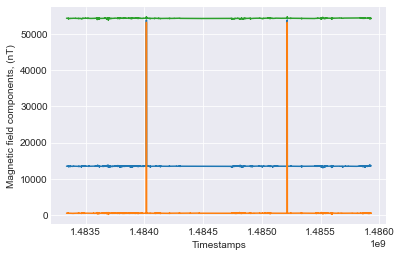

<Figure size 432x288 with 0 Axes>

In [52]:
# Plot the values for the CH1, CH2, CH3 values
plt.style.use('seaborn-darkgrid')

plt.figsize=(20,10)
plt.plot(timestamps, CH1_values)
plt.plot(timestamps, CH2_values)
plt.plot(timestamps, CH3_values)

plt.xlabel('Timestamps')
plt.ylabel('Magnetic field components, (nT)')
plt.show()
plt.savefig('.\\data\\THEMIS\\CH1_2_3_Sample_Plot.png')

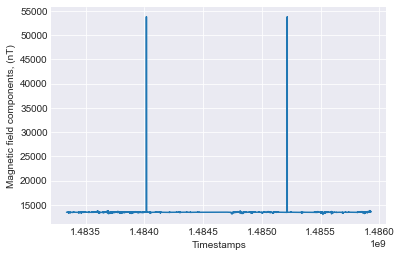

<Figure size 432x288 with 0 Axes>

In [49]:
plt.plot(timestamps, CH1_values)
plt.xlabel('Timestamps')
plt.ylabel('Magnetic field components, (nT)')
plt.show()
plt.savefig('.\\data\\THEMIS\\CH1_Sample_Plot.png')

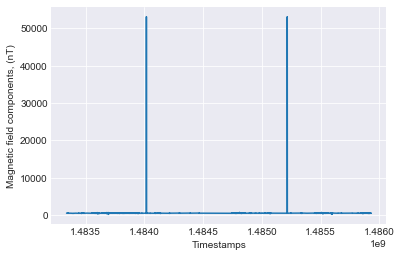

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(timestamps, CH2_values)
plt.xlabel('Timestamps')
plt.ylabel('Magnetic field components, (nT)')
plt.show()
plt.savefig('.\\data\\THEMIS\\CH2_Sample_Plot.png')

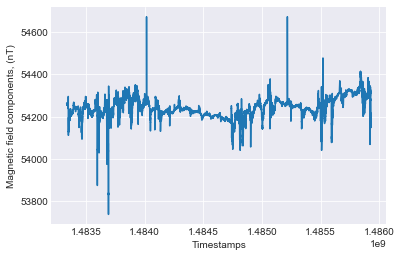

<Figure size 432x288 with 0 Axes>

In [54]:
plt.plot(timestamps, CH3_values)
plt.xlabel('Timestamps')
plt.ylabel('Magnetic field components, (nT)')
plt.show()
plt.savefig('.\\data\\THEMIS\\CH3_Sample_Plot.png')

In [57]:
# Dataframe for regression
regression_df = pd.DataFrame(columns=['Timestamp','CH1','CH2','CH3'])
regression_df['Timestamp'] = timestamps
regression_df['CH1'] = CH1_values
regression_df['CH2'] = CH2_values
regression_df['CH3'] = CH3_values
regression_df.set_index('Timestamp')
display(regression_df)
regression_df.to_csv('.\\data\\formatted\\jan2017gmagint.csv')

,Timestamp,CH1,CH2,CH3
0,1.483337e+09,13483,536,54265
1,1.483337e+09,13483,540,54264
2,1.483337e+09,13485,540,54263
3,1.483337e+09,13485,541,54263
4,1.483337e+09,13487,539,54262
5,1.483337e+09,13489,536,54261
6,1.483337e+09,13488,536,54261
7,1.483337e+09,13489,534,54261
8,1.483337e+09,13489,532,54260
9,1.483337e+09,13490,530,54260


## Create regression model for forecasting the magnetometer values

## Methods

### 1. Neural networks
### 2. ARIMA models for Time-series forecasting

## Method 1 : Neural network

In [73]:
# Layer and Model Initializers from Keras
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Bidirectional, GRU

# Visualizers for the model
from keras.utils import plot_model

# Optimizizers for training and network performance
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, RMSprop, SGD

# Initialize the neural network model
opt = SGD(lr=0.05, nesterov=True)
batch_size = 4
past_timesteps = 1

# Define the network model and layers
input_1 = Input(batch_shape=(batch_size, past_timesteps))
dense_2 = Dense(units=5, activation='relu')(input_1)
dense_3 = Dense(units=10, activation='relu')(dense_2)
dense_6 = Dense(units=10, activation='sigmoid')(dense_3)
dense_7 = Dense(units=5, activation='relu')(dense_6)
output_1 = Dense(units=1)(dense_7)
        
# Generate and compile the model
predictor = Model(inputs=input_1, outputs=output_1)
predictor.compile(optimizer= opt, loss= 'mae', metrics=['mape', 'mse', 'mae'])
predictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (4, 1)                    0         
_________________________________________________________________
dense_24 (Dense)             (4, 5)                    10        
_________________________________________________________________
dense_25 (Dense)             (4, 10)                   60        
_________________________________________________________________
dense_26 (Dense)             (4, 10)                   110       
_________________________________________________________________
dense_27 (Dense)             (4, 5)                    55        
_________________________________________________________________
dense_28 (Dense)             (4, 1)                    6         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Create the training dataset - Use CH1 to predict CH2, and in the future

## Next Steps :

## 1. Creating Bayesian probabilistic network by correlating the ASI dataset with the GMAG dataset using Bayesian learning to determine the probability of an aurora detection for next t hours.
## 2. Creating forecasting model for predicting the outbursts in the GMAG readings to get forecast on the auroras.

![neural_network_model](.\data\THEMIS\misc_images\neuralnet.png)

In [83]:
predictor.fit(x=CH1_values[0:int(len(CH1_values)/3)-1], y=CH2_values[0:int(len(CH2_values)/3)-1], batch_size=4, epochs=50, verbose=2, shuffle=False)

Epoch 1/50
 - 22s - loss: 75.3980 - mean_absolute_percentage_error: 8.2091 - mean_squared_error: 1725301.6251 - mean_absolute_error: 75.3980
Epoch 2/50
 - 23s - loss: 75.0023 - mean_absolute_percentage_error: 8.1270 - mean_squared_error: 1730427.8669 - mean_absolute_error: 75.0023
Epoch 3/50
 - 23s - loss: 74.2905 - mean_absolute_percentage_error: 7.9883 - mean_squared_error: 1730865.5227 - mean_absolute_error: 74.2905
Epoch 4/50
 - 23s - loss: 73.5078 - mean_absolute_percentage_error: 7.8523 - mean_squared_error: 1724645.0446 - mean_absolute_error: 73.5078
Epoch 5/50
 - 20s - loss: 72.9356 - mean_absolute_percentage_error: 7.7350 - mean_squared_error: 1725469.4575 - mean_absolute_error: 72.9356
Epoch 6/50
 - 20s - loss: 72.3708 - mean_absolute_percentage_error: 7.6182 - mean_squared_error: 1731599.6686 - mean_absolute_error: 72.3708
Epoch 7/50
 - 21s - loss: 71.6975 - mean_absolute_percentage_error: 7.4921 - mean_squared_error: 1730262.2381 - mean_absolute_error: 71.6975
Epoch 8/50
 -

In [84]:
predicted_CH2 = predictor.predict(CH1_values[500:])
display(predicted_CH2)
display(CH2_values)

array([[508.40002],
       [508.40002],
       [508.40002],
       ...,
       [508.40002],
       [508.40002],
       [508.40002]], dtype=float32)

[536,
 540,
 540,
 541,
 539,
 536,
 536,
 534,
 532,
 530,
 529,
 529,
 529,
 529,
 528,
 526,
 527,
 528,
 528,
 528,
 526,
 527,
 528,
 530,
 530,
 530,
 529,
 531,
 531,
 532,
 535,
 534,
 537,
 535,
 536,
 534,
 535,
 536,
 539,
 541,
 542,
 540,
 540,
 539,
 537,
 534,
 531,
 531,
 532,
 535,
 533,
 533,
 534,
 534,
 536,
 534,
 533,
 533,
 533,
 534,
 534,
 534,
 533,
 534,
 533,
 533,
 534,
 534,
 534,
 532,
 533,
 533,
 533,
 532,
 531,
 531,
 532,
 533,
 532,
 533,
 532,
 533,
 534,
 534,
 535,
 534,
 533,
 533,
 534,
 533,
 532,
 533,
 533,
 534,
 532,
 533,
 533,
 531,
 531,
 531,
 532,
 530,
 529,
 528,
 527,
 528,
 529,
 530,
 531,
 532,
 535,
 535,
 538,
 538,
 537,
 535,
 534,
 533,
 535,
 535,
 535,
 533,
 530,
 529,
 526,
 526,
 528,
 528,
 528,
 529,
 531,
 532,
 530,
 526,
 526,
 526,
 526,
 527,
 526,
 528,
 528,
 528,
 528,
 527,
 527,
 528,
 529,
 530,
 532,
 532,
 531,
 531,
 531,
 531,
 531,
 531,
 530,
 530,
 529,
 529,
 529,
 529,
 529,
 532,
 535,
 535,
 535

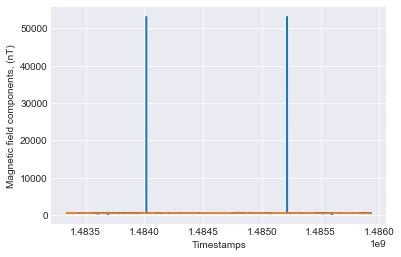

<Figure size 432x288 with 0 Axes>

In [85]:
plt.plot(timestamps, CH2_values)

list_predictions = CH2_values[0:500]
list_predictions.extend(predicted_CH2)
plt.plot(timestamps, list_predictions)
plt.xlabel('Timestamps')
plt.ylabel('Magnetic field components, (nT)')
plt.show()
plt.savefig('.\\data\\THEMIS\\CH2_Predicted_Sample_Plot.png')

## Since the neural network is unable to reconstruct the outbursts, can look into models such as the MMPP to forecast the outburst values.